In [1]:
%store -r __importData
import pandas as pd
import numpy as np
import ggplot as gplt
from sklearn.preprocessing import LabelEncoder
from feature_extraction import AirlineFeature
import seaborn as sns
import matplotlib.pyplot as plt
import time

C:\Users\S\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\S\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\S\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
__importData

import group_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import airline_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import order_table
import train_set
import test_set


In [3]:
drop_feature = []
airline_table = AirlineFeature.airline_feature(airline_table, drop_feature)

C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyboardInterrupt: 

In [4]:
train_set = pd.merge(train_set, order_table, on="order_id", how="left")
train_set = pd.merge(train_set, group_table, on="group_id", how="left")
#train_set = pd.merge(train_set, airline_table, on="group_id", how="left")

test_set = pd.merge(test_set, order_table, on="order_id", how="left")
test_set = pd.merge(test_set, group_table, on="group_id", how="left")
#test_set = pd.merge(test_set, airline_table, on="group_id", how="left")
main_table = pd.concat([train_set, test_set])
main_table.index = list(range(main_table.shape[0]))
"""main_table = pd.merge(train_set, order_table, on="order_id", how="left")
main_table = pd.merge(main_table, group_table, on="group_id", how="left")"""

'main_table = pd.merge(train_set, order_table, on="order_id", how="left")\nmain_table = pd.merge(main_table, group_table, on="group_id", how="left")'

In [7]:
train_set["order_date"] = pd.to_datetime(train_set["order_date"])
gb = train_set.groupby(["group_id", "order_date"])

In [2]:
train_set = pd.read_csv("dataset/train_val/training_set.csv")
test_set = pd.read_csv("dataset/train_val/testing_set.csv")

In [3]:
print("train shape:", train_set.shape)
print("test shape:", test_set.shape)
#print("order shape:", order_table.shape)

train shape: (297020, 83)
test shape: (99895, 83)


In [5]:
main_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396915 entries, 0 to 99894
Data columns (total 15 columns):
order_id          396915 non-null object
deal_or_not       297020 non-null float64
group_id          396915 non-null object
order_date        396915 non-null object
source_1          396915 non-null object
source_2          396915 non-null object
unit              396915 non-null object
people_amount     396915 non-null int64
sub_line          396915 non-null object
area              396915 non-null object
days              396915 non-null float64
begin_date        396915 non-null object
price             396915 non-null float64
product_name      396906 non-null object
promotion_prog    396795 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 48.5+ MB


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297020 entries, 0 to 297019
Data columns (total 15 columns):
order_id          297020 non-null object
deal_or_not       297020 non-null int64
group_id          297020 non-null object
order_date        297020 non-null object
source_1          297020 non-null object
source_2          297020 non-null object
unit              297020 non-null object
people_amount     297020 non-null int64
sub_line          297020 non-null object
area              297020 non-null object
days              297020 non-null float64
begin_date        297020 non-null object
price             297020 non-null float64
product_name      297013 non-null object
promotion_prog    296942 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 36.3+ MB


在訓練集中有783筆訂單沒有航班資訊

In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99895 entries, 0 to 99894
Data columns (total 15 columns):
order_id          99895 non-null object
deal_or_not       0 non-null float64
group_id          99895 non-null object
order_date        99895 non-null object
source_1          99895 non-null object
source_2          99895 non-null object
unit              99895 non-null object
people_amount     99895 non-null int64
sub_line          99895 non-null object
area              99895 non-null object
days              99895 non-null float64
begin_date        99895 non-null object
price             99895 non-null float64
product_name      99893 non-null object
promotion_prog    99853 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 12.2+ MB


在測試集中有121筆訂單沒有航班資訊

In [8]:
set(train_set.group_id).intersection(set(test_set.group_id))

set()

訓練集與測試集的所用的group_id是完全獨立的

In [4]:
main_table["train_or_not"] = np.concatenate([np.ones(train_set.shape[0]), np.zeros(test_set.shape[0])])
#gplt.ggplot(main_table, gplt.aes(x="group_id", y="train_or_not")) \
# + gplt.geom_point()

group_id與訓練集/測試集之切分無關

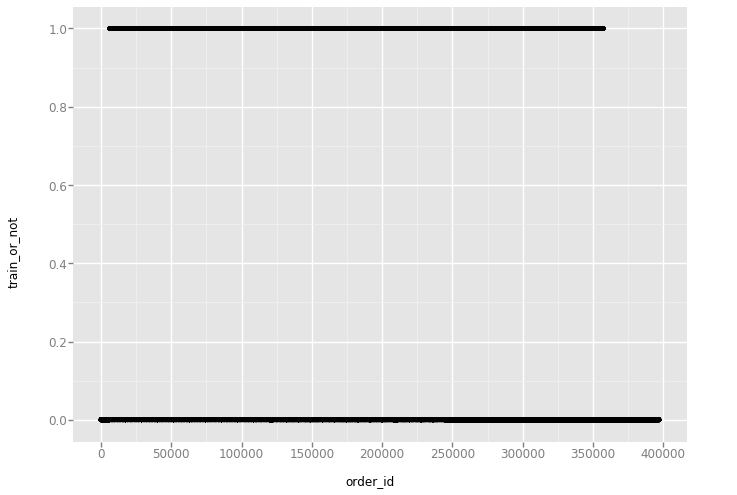

<ggplot: (127556782554)>

In [8]:
gplt.ggplot(main_table, gplt.aes(x="order_id", y="train_or_not")) \
 + gplt.geom_point()

order_id與訓練集/測試集之切分無關

In [7]:
train_set["deal_or_not"].value_counts()

0    238432
1     58588
Name: deal_or_not, dtype: int64

negative:positive 差不多是 4:1，test set的分佈應該也差不多是這個比例

In [21]:
main_table["order_date"] = pd.to_datetime(main_table["order_date"])
main_table["order_DoY"] = main_table.order_date.dt.dayofyear
main_table["order_relative_date"] = main_table["order_date"] - main_table["order_date"].min()
main_table["order_relative_date"] = main_table["order_relative_date"].dt.days

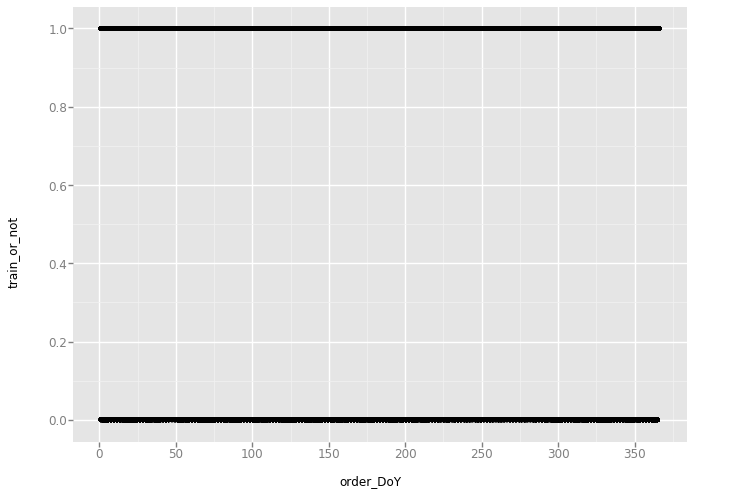

<ggplot: (-9223371885447253174)>

In [13]:
gplt.ggplot(main_table, gplt.aes(x="order_DoY", y="train_or_not")) \
 + gplt.geom_point()

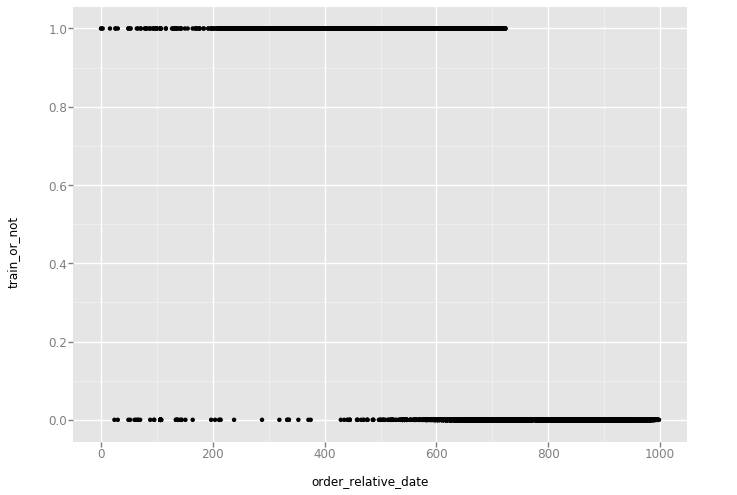

<ggplot: (-9223371872882681428)>

In [22]:
gplt.ggplot(main_table, gplt.aes(x="order_relative_date", y="train_or_not")) \
 + gplt.geom_point()

訂單的先後順序與train/test split似乎有一點關係

In [22]:
main_table["begin_date"] = pd.to_datetime(main_table["begin_date"])
main_table["begin_DoY"] = main_table["begin_date"].dt.dayofyear
main_table["begin_relative_date"] = main_table["begin_date"] - main_table["begin_date"].min()
main_table["begin_relative_date"] = main_table["begin_relative_date"].dt.days

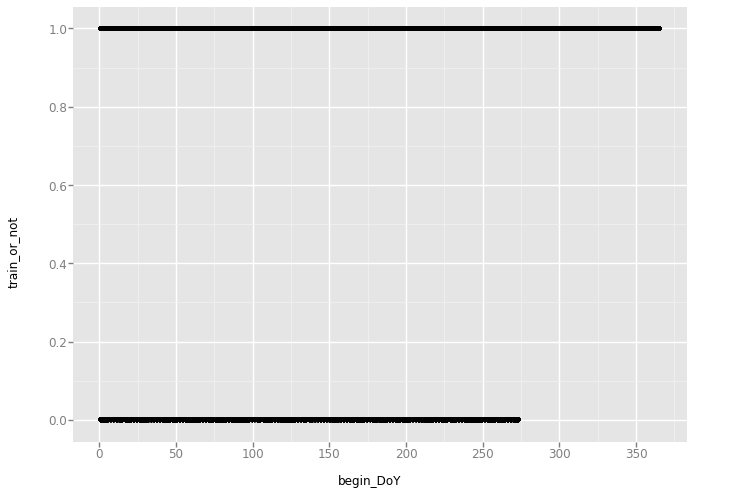

<ggplot: (-9223371885446868413)>

In [16]:
gplt.ggplot(main_table, gplt.aes(x="begin_DoY", y="train_or_not")) \
 + gplt.geom_point()

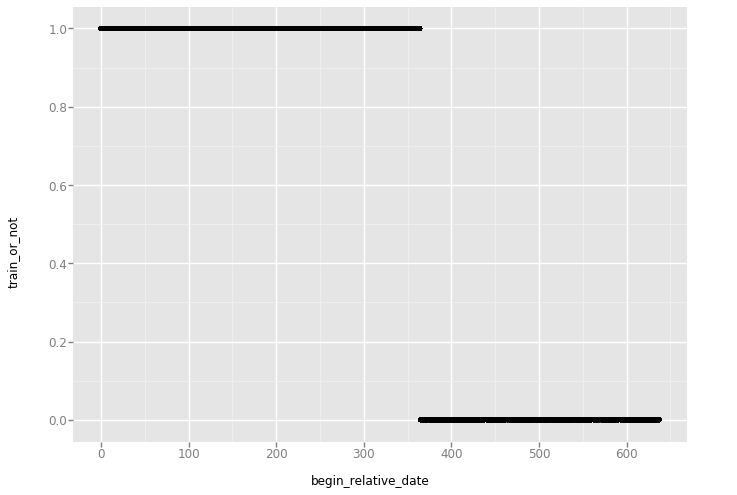

<ggplot: (-9223371885451517780)>

In [23]:
gplt.ggplot(main_table, gplt.aes(x="begin_relative_date", y="train_or_not")) \
 + gplt.geom_point()

看來訓練與測試集是按照出團時間做切分的

In [41]:
main_table["begin_year"] = main_table["begin_date"].dt.year
main_table["begin_year"].value_counts()

2017    297020
2018     99895
Name: begin_year, dtype: int64

按照以上分析，可以對training set做group_id-wise split，切出validation set，並使這兩者的deal_or_not有相同的分佈

In [29]:
train_set[train_set["deal_or_not"] == 1]

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount,sub_line,area,...,abroad_year,abroad_DoY,abroad_DoW,abroad_DoM,home_year,home_DoW,home_DoM,home_DoY,home_hour,home_part_of_day
3,258295,1,29411,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4,subline_value_1,area_value_1,...,2017.0,137.0,2.0,17.0,2017.0,6.0,28.0,148.0,21.0,evening
4,296636,1,29411,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1,subline_value_1,area_value_1,...,2017.0,137.0,2.0,17.0,2017.0,6.0,28.0,148.0,21.0,evening
13,347143,1,21817,3-May-17,src1_value_2,src2_value_1,unit_value_5,1,subline_value_1,area_value_1,...,2017.0,193.0,2.0,12.0,2017.0,6.0,23.0,204.0,21.0,evening
14,73117,1,21817,10-Apr-17,src1_value_1,src2_value_1,unit_value_10,4,subline_value_1,area_value_1,...,2017.0,193.0,2.0,12.0,2017.0,6.0,23.0,204.0,21.0,evening
15,97263,1,21817,17-Apr-17,src1_value_1,src2_value_1,unit_value_11,5,subline_value_1,area_value_1,...,2017.0,193.0,2.0,12.0,2017.0,6.0,23.0,204.0,21.0,evening
21,198743,1,15504,23-Jun-17,src1_value_1,src2_value_1,unit_value_15,1,subline_value_1,area_value_1,...,2017.0,221.0,2.0,9.0,2017.0,6.0,20.0,232.0,21.0,evening
22,217389,1,15504,31-May-17,src1_value_2,src2_value_1,unit_value_16,2,subline_value_1,area_value_1,...,2017.0,221.0,2.0,9.0,2017.0,6.0,20.0,232.0,21.0,evening
23,286429,1,15504,18-Jul-17,src1_value_1,src2_value_4,unit_value_16,1,subline_value_1,area_value_1,...,2017.0,221.0,2.0,9.0,2017.0,6.0,20.0,232.0,21.0,evening
24,301309,1,15504,6-May-17,src1_value_1,src2_value_1,unit_value_17,3,subline_value_1,area_value_1,...,2017.0,221.0,2.0,9.0,2017.0,6.0,20.0,232.0,21.0,evening
25,103028,1,15504,31-May-17,src1_value_3,src2_value_1,unit_value_16,4,subline_value_1,area_value_1,...,2017.0,221.0,2.0,9.0,2017.0,6.0,20.0,232.0,21.0,evening


In [30]:
58588 * 0.2

11717.6

In [93]:
train_nunique = train_set.nunique(dropna=False)
train_nunique

order_id              297020
deal_or_not                2
group_id               35292
order_date               558
source_1                   3
source_2                   4
unit                     121
people_amount             45
sub_line                  23
area                     141
days                      15
begin_date               365
price                    609
product_name            4451
promotion_prog          3875
airport_amount             5
airport_consistent         3
abroad_airport             9
abroad_time            21666
home_airport              10
home_time              22179
abroad_hour               25
abroad_part_of_day         5
abroad_year                2
abroad_DoY               366
abroad_DoW                 8
abroad_DoM                32
home_year                  4
home_DoW                   8
home_DoM                  32
home_DoY                 366
home_hour                 25
home_part_of_day           5
dtype: int64

In [92]:
test_nunique = test_set.nunique(dropna=False)
test_nunique

order_id              99895
deal_or_not               1
group_id               9750
order_date              509
source_1                  3
source_2                  4
unit                    124
people_amount            42
sub_line                 23
area                    134
days                     15
begin_date              264
price                   552
product_name           2805
promotion_prog         3731
airport_amount            6
airport_consistent        3
abroad_airport            8
abroad_time            7202
home_airport              8
home_time              7363
abroad_hour              23
abroad_part_of_day        5
abroad_year               2
abroad_DoY              265
abroad_DoW                8
abroad_DoM               31
home_year                 2
home_DoW                  8
home_DoM                 32
home_DoY                280
home_hour                22
home_part_of_day          5
dtype: int64

In [107]:
not_ordered_groupID = list(set(group_table.group_id).difference(set(train_set.group_id).union(set(test_set.group_id))))
len(not_ordered_groupID)

4181

有4181個旅遊團沒被下過訂單，所以與它相似的團成交率也較低？

In [124]:
not_ordered_group = group_table[group_table["group_id"].isin(not_ordered_group)]

train_set與test_set都沒有constant feature

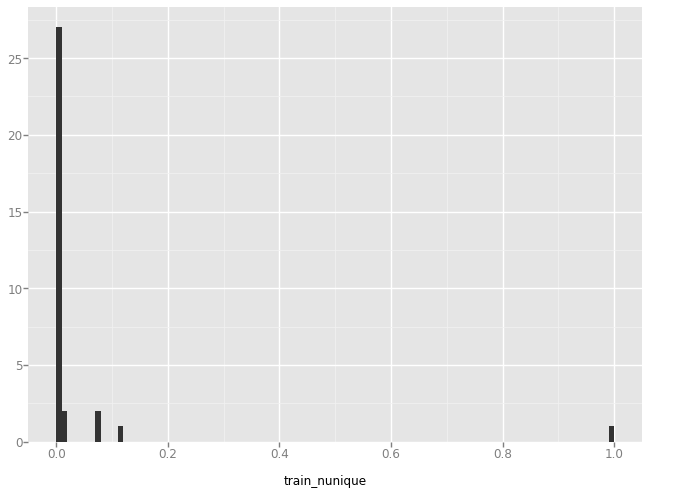

<ggplot: (-9223371932254439466)>

In [112]:
tmp_df = pd.DataFrame()
tmp_df["train_nunique"] = train_nunique.astype(float) / train_set.shape[0]
tmp_df["test_nunique"] = test_nunique.astype(float) / test_set.shape[0]
gplt.ggplot(tmp_df, gplt.aes(x="train_nunique")) \
 + gplt.geom_histogram(binwidth=0.01)

1.0是deal_or_not

In [9]:
cat_feats = train_set.select_dtypes(include=["object"]).columns
num_feats = train_set.select_dtypes(exclude=["object"]).columns

In [10]:
num_feats

Index(['deal_or_not', 'people_amount', 'days', 'price'], dtype='object')

In [11]:
cat_feats

Index(['order_id', 'group_id', 'order_date', 'source_1', 'source_2', 'unit',
       'sub_line', 'area', 'begin_date', 'product_name', 'promotion_prog'],
      dtype='object')

In [14]:
for col in ['source_1', 'source_2', 'unit', 'sub_line', 'area']:
    print(set(test_set[col]).difference(set(train_set[col])))

set()
set()
{'unit_value_131', 'unit_value_127', 'unit_value_125', 'unit_value_123', 'unit_value_122', 'unit_value_124', 'unit_value_126', 'unit_value_130', 'unit_value_129'}
set()
{'area_value_156', 'area_value_150', 'area_value_144', 'area_value_146', 'area_value_157', 'area_value_145', 'area_value_147', 'area_value_153', 'area_value_142', 'area_value_155', 'area_value_143', 'area_value_149', 'area_value_152', 'area_value_151'}


testing set中的unit與area有部分沒出現在training set中

In [43]:
unit_diff = list(set(test_set["unit"]).difference(set(train_set["unit"])))
area_diff = list(set(test_set["area"]).difference(set(train_set["area"])))
overall_diff = {"unit_diff": unit_diff,
                "area_diff": area_diff}
diff_ind = []
for col in ["unit", "area"]:
    gb = test_set.groupby(col)
    for diff in overall_diff[col+"_diff"]:
        diff_ind.extend(list(gb.groups[diff]))

print("information training-set not contained:", len(set(diff_ind)) / test_set.shape[0])

information training-set not contained: 0.011061614695430202


training set沒有涵蓋到的訊息為1%左右，先放著不管

In [70]:
def airport_amount(tmp_table):
    return len(set(tmp_table["src_airport"]).union(tmp_table["dst_airport"]))

airline_gb = airline_table.groupby("group_id")
airport_numbers = airline_gb.apply(airport_amount)
airport_numbers = airport_numbers.to_frame()
airport_numbers["group_id"] = airport_numbers.index
airport_numbers.columns = ["airport_amount", "group_id"]
airline_table = pd.merge(airline_table, airport_numbers, on="group_id", how="left")

train_set = pd.merge(train_set, airport_numbers, on="group_id", how="left")
test_set = pd.merge(test_set, airport_numbers, on="group_id", how="left")
main_table = pd.merge(main_table, airport_numbers, on="group_id", how="left")

In [125]:
airline_table.airport_amount.value_counts()

2    80455
3    16719
4     6305
5      782
9        8
6        6
Name: airport_amount, dtype: int64

In [137]:
group_table.columns

Index(['group_id', 'sub_line', 'area', 'days', 'begin_date', 'price',
       'product_name', 'promotion_prog'],
      dtype='object')

In [136]:
train_set.columns

Index(['order_id', 'deal_or_not', 'group_id', 'order_date', 'source_1',
       'source_2', 'unit', 'people_amount', 'sub_line', 'area', 'days',
       'begin_date', 'price', 'product_name', 'promotion_prog',
       'airport_amount', 'airport_days'],
      dtype='object')

In [45]:
train_set = main_table[main_table["train_or_not"] == 1]
train_set.groupby("deal_or_not")["order_relative_date"].describe()

,count,mean,std,min,25%,50%,75%,max
deal_or_not,,,,,,,,
0.0,238432.0,487.278364,107.124695,0.0,403.0,487.0,571.0,723.0
1.0,58588.0,497.981822,106.399231,217.0,414.0,500.0,581.0,723.0


In [47]:
train_set.groupby("deal_or_not")["begin_relative_date"].describe()

,count,mean,std,min,25%,50%,75%,max
deal_or_not,,,,,,,,
0.0,238432.0,178.377391,103.514536,0.0,89.0,176.0,272.0,364.0
1.0,58588.0,182.500222,102.380038,0.0,93.0,183.0,273.0,364.0


In [49]:
test_set = main_table[main_table["train_or_not"] == 0]
test_set[test_set["order_date"] == test_set["order_date"].min()]

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount,sub_line,area,...,begin_date,price,product_name,promotion_prog,train_or_not,order_DoY,order_relative_date,begin_DoY,begin_relative_date,begin_year
58541,d72274a78bd802f6e37e640c4f775b6b,NaN,2c7d9a9953f6c364e84fe2f011a8f619,2016-01-28,src1_value_2,src2_value_1,unit_value_100,5,subline_value_12,area_value_93,...,2018-04-19,17888.0,【特選首爾】保證入住首爾喜來登酒店1晚．入住渡假村．樂天世界樂園．冰雪樂園．小法國村．南怡島...,【特選首爾】保證入住首爾喜來登酒店1晚．入住渡假村．樂天世界樂園．冰雪樂園．小法國村．南怡島...,0.0,28,24,109,473,2018


In [51]:
main_table["order_begin_duration"] = (main_table["begin_date"] - main_table["order_date"]).dt.days
train_set = main_table[main_table["train_or_not"] == 1]
test_set = main_table[main_table["train_or_not"] == 0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023427398898>,
      dtype=object)

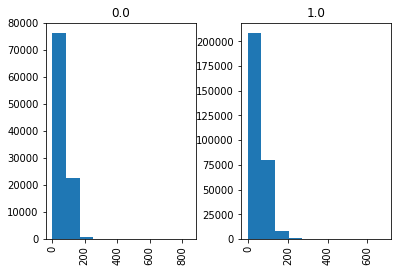

In [52]:
main_table.hist("order_begin_duration", by="train_or_not")

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002340DBF1DD8>,
      dtype=object)

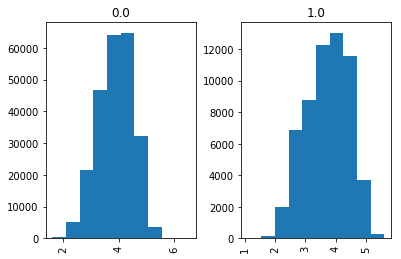

In [62]:
train_set["obd_log"] = np.log(train_set["order_begin_duration"] + 5)
train_set.hist("obd_log", by="deal_or_not")

In [44]:
x = train_set.group_id.value_counts()
group_id_map = {}
for gpid, value in zip(x.index, x):
    group_id_map[gpid] = value
train_set["group_id_count"] = train_set.group_id.map(group_id_map)

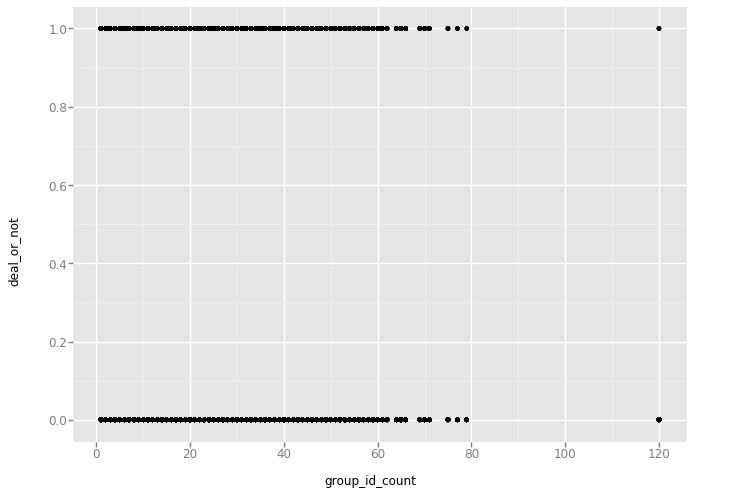

<ggplot: (-9223371897783235598)>

In [12]:
gplt.ggplot(train_set, gplt.aes(x="group_id_count", y="deal_or_not")) \
 + gplt.geom_point()

In [42]:
gp_id_target = train_set.groupby("group_id", as_index=False)["deal_or_not"].mean()
gp_id_target.rename({"deal_or_not": "deal_ratio"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, gp_id_target, on="group_id", how="left")

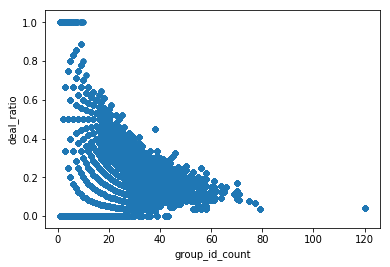

In [45]:
train_set.plot(kind="scatter", x="group_id_count", y="deal_ratio")

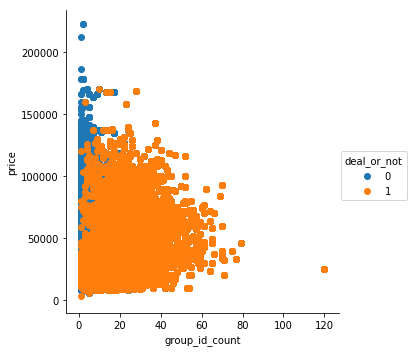

In [50]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "group_id_count", "price") \
   .add_legend()

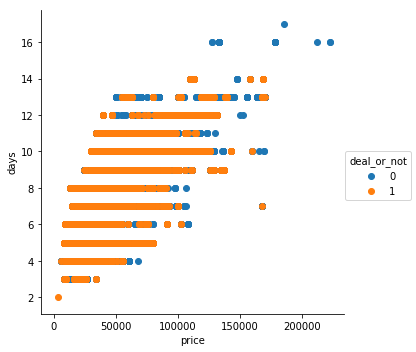

In [51]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "price", "days") \
   .add_legend()

In [7]:
x = main_table.group_id.value_counts()
group_id_map = {}
for gpid, value in zip(x.index, x):
    group_id_map[gpid] = value
main_table["group_id_count"] = main_table.group_id.map(group_id_map)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0417517F0>,
      dtype=object)

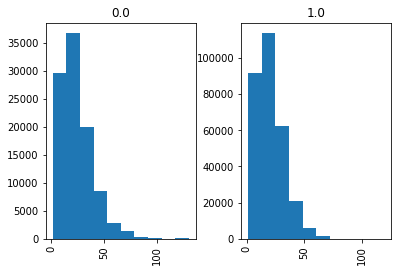

In [8]:
main_table.hist("group_id_count", by="train_or_not")

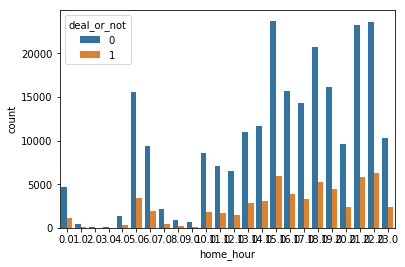

In [7]:
sns.countplot(x="home_hour", hue="deal_or_not", data=train_set)

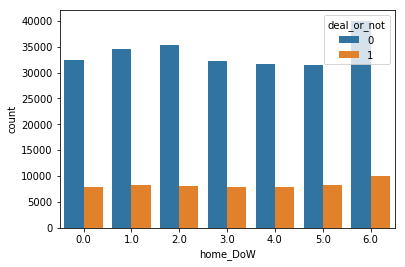

In [8]:
sns.countplot(x="home_DoW", hue="deal_or_not", data=train_set)

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


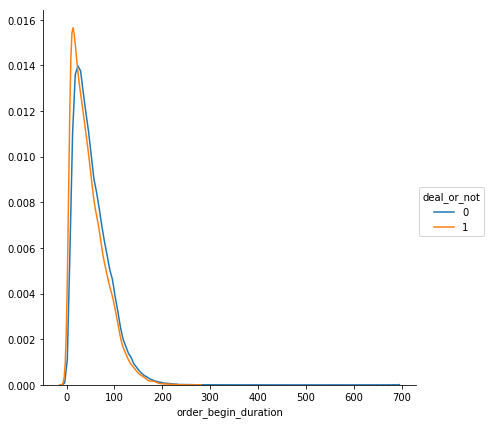

In [10]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "order_begin_duration") \
   .add_legend()

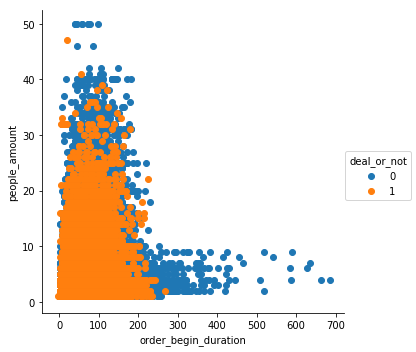

In [14]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "order_begin_duration", "people_amount") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


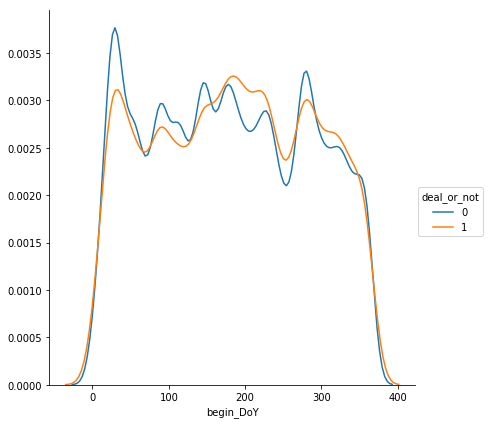

In [15]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "begin_DoY") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


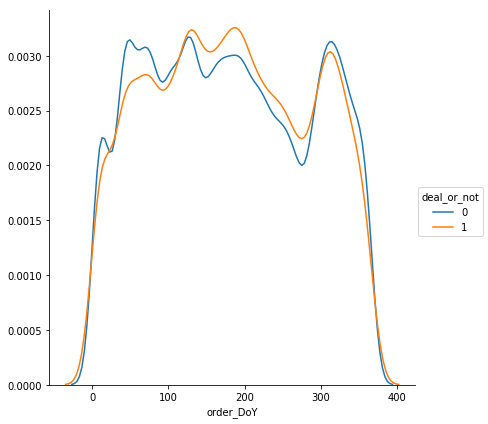

In [16]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "order_DoY") \
   .add_legend()

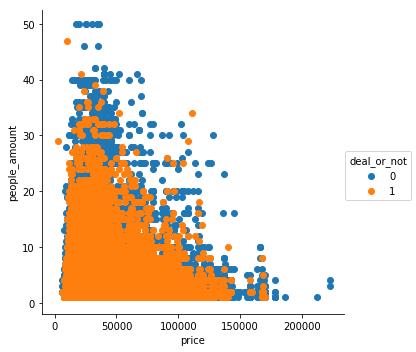

In [17]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "price", "people_amount") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


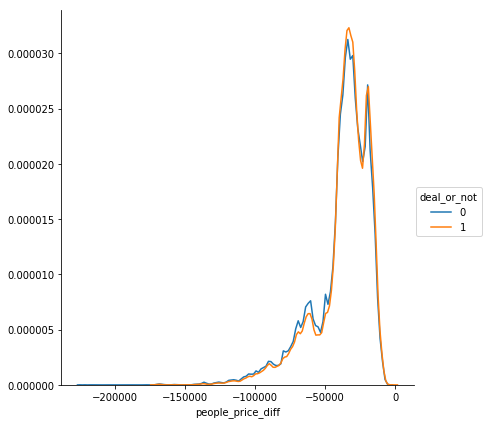

In [18]:
train_set["people_price_diff"] = train_set["people_amount"] - train_set["price"]
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "people_price_diff") \
   .add_legend()

In [26]:
train_set[train_set["group_id"] == "63695"]

,order_id,deal_or_not,group_id,order_date,source_1,source_2,unit,people_amount,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,136100,0,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,140370,0,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,211009,0,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2,subline_value_1,area_value_1,12.0,22-Mar-17,106900.0,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [224]:
def accum_order(table):
    gb = table.groupby("group_id")
    accum = pd.DataFrame(columns=["order_id", "accum_order"], index=range(table.shape[0]))
    for gpid in table.group_id.unique():
        tmp_df = table.iloc[gb.groups[gpid]]
        accum["order_id"].iloc[tmp_df.index] = tmp_df["order_id"]
        tmp_accum = np.zeros(tmp_df.shape[0])
        tmp_accum[list(np.argsort(tmp_df["order_date"]))] = list(range(tmp_df.shape[0]))
        accum["accum_order"].iloc[tmp_df.index] = tmp_accum
    return accum

main_table["order_date"] = pd.to_datetime(main_table["order_date"])
s = time.clock()
accum = accum_order(main_table)
e = time.clock()
print("time used:", (e-s) / 60, "min")
accum.to_csv("accum_order.csv", encoding="utf-8", index=False)

time used: 16.24713488374479 min


In [240]:
x = train_set.group_id.value_counts()
group_id_map = {}
for gpid, value in zip(x.index, x):
    group_id_map[gpid] = value
train_set["group_id_count"] = train_set.group_id.map(group_id_map)

accum = pd.read_csv("./feature_extraction/accum_order.csv")
accum.order_id = accum.order_id.astype(str)
train_set = pd.merge(train_set, accum, on="order_id", how="left")
train_set["order_date"] = pd.to_datetime(train_set["order_date"])

C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


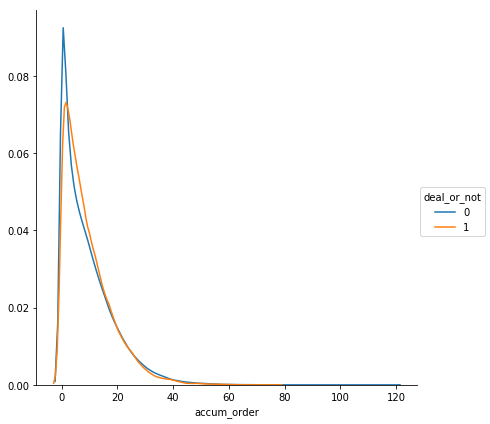

In [243]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "accum_order") \
   .add_legend()

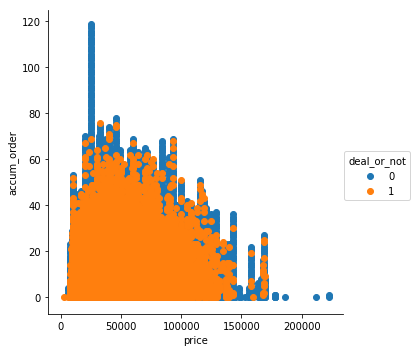

In [247]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "price", "accum_order") \
   .add_legend()

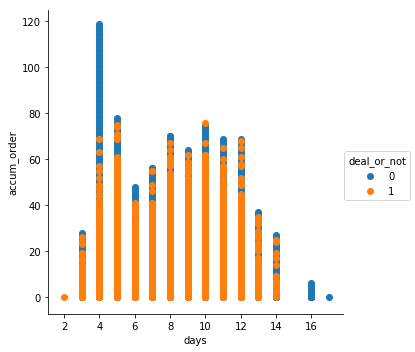

In [248]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "days", "accum_order") \
   .add_legend()

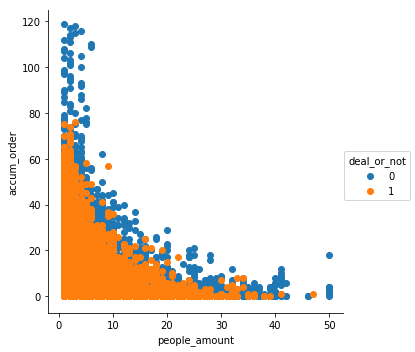

In [249]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "people_amount", "accum_order") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


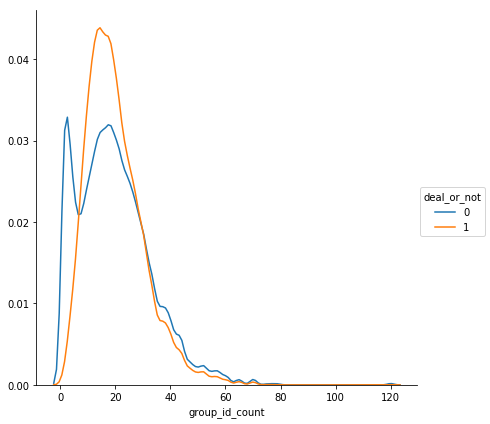

In [250]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "group_id_count") \
   .add_legend()

In [5]:
train_set.columns

Index(['order_id', 'deal_or_not', 'group_id', 'source_1', 'source_2', 'unit',
       'people_amount', 'source1_source2', 'source1_unit', 'source2_unit',
       'source1_source2_unit', 'order_year', 'order_month', 'order_DoY',
       'order_quarter', 'sub_line', 'area', 'days', 'price', 'day_price',
       'subline_area', 'begin_month', 'begin_DoY', 'begin_DoW',
       'begin_quarter', 'prod_vec_1', 'prod_vec_2', 'prod_vec_3', 'prod_vec_4',
       'prod_vec_5', 'prod_vec_6', 'prod_vec_7', 'prod_vec_8', 'prod_vec_9',
       'prod_vec_10', 'prod_vec_11', 'prod_vec_12', 'prod_vec_13',
       'prod_vec_14', 'prod_vec_15', 'prod_vec_16', 'prod_vec_17',
       'prod_vec_18', 'prod_vec_19', 'prod_vec_20', 'flight_time_sum',
       'flight_time_mean', 'flight_time_std', 'flight_time_min',
       'flight_time_max', 'flight_dist_sum', 'flight_dist_mean',
       'flight_dist_std', 'flight_dist_min', 'flight_dist_max',
       'time_dist_sum', 'time_dist', 'time_dist_std', 'time_dist_min',
       't

In [9]:
train_set["accum_count_ratio"] = train_set["accum_order"] / train_set["group_id_count"]
train_set["accum_count_diff"] = train_set["group_id_count"] - train_set["accum_order"]

In [ ]:
AirlineFeature

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


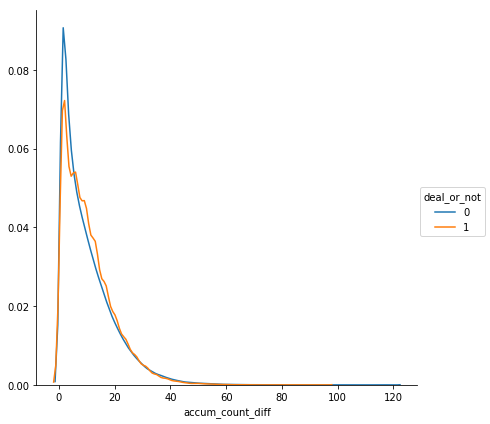

In [12]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "accum_count_diff") \
   .add_legend()

In [43]:
tmp = airline_table.groupby(["group_id", "go_back"])["flight_time"].agg({"flight_time": {
                                                                        "flight_time_mean": "mean",
                                                                        "flight_time_min": "min",
                                                                        "flight_time_max": "max",
                                                                        "flight_time_median": "median",
                                                                        "flight_time_std": "std"}}).reset_index()
tmp.columns = [tmp.columns.values[0][0], tmp.columns.values[1][0]] + [x[1] for x in tmp.columns.values[2:]]

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\S\Anaconda3\lib\site-packages\pandas\core\groupby.py:3198: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


In [49]:
tmp_go = tmp[tmp["go_back"]=="去程"].drop(columns=["go_back"])
tmp_back = tmp[tmp["go_back"]=="回程"].drop(columns=["go_back"])
train_order = pd.merge(train_set, order_table[["order_id", "group_id"]], on="order_id", how="left")
flight_time_dta = pd.merge(train_order, tmp_go, on="group_id", how="left")
flight_time_dta = pd.merge(flight_time_dta, tmp_back, on="group_id", how="left")
flight_time_dta = pd.merge(flight_time_dta, group_table[["group_id", "days", "price"]], on="group_id", how="left")

In [77]:
#for col in flight_time_dta.columns[3:13]:
#    flight_time_dta[col] = flight_time_dta[col] / flight_time_dta["days"]

for col in flight_time_dta.columns[3:13]:
    flight_time_dta[col] = flight_time_dta[col] * flight_time_dta["days"] / flight_time_dta["price"]

In [81]:
for col in flight_time_dta.columns[3:13]:
    flight_time_dta[col] = flight_time_dta[col] * 1000

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


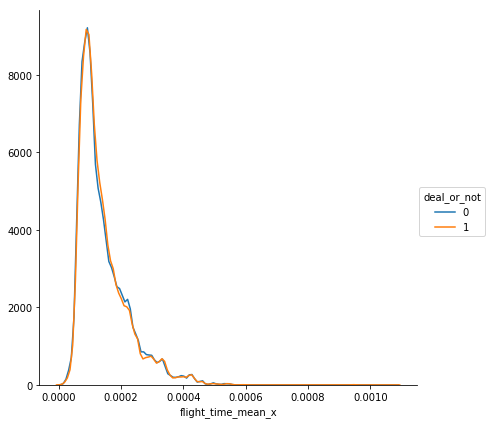

In [79]:
sns.FacetGrid(flight_time_dta, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "flight_time_mean_x") \
   .add_legend()

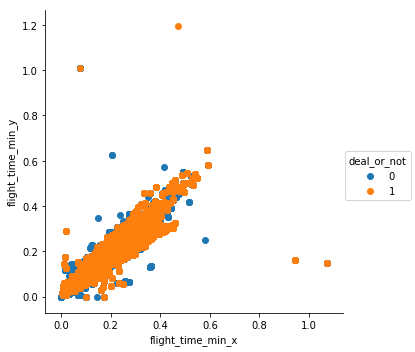

In [82]:
sns.FacetGrid(flight_time_dta, hue="deal_or_not", size=5) \
   .map(plt.scatter, "flight_time_min_x", "flight_time_min_y") \
   .add_legend()

In [88]:
tmp_table = pd.merge(train_set, order_table[["order_id", "group_id", "people_amount"]], on="order_id", how="left")
group_people_sum = tmp_table.groupby("group_id")["people_amount"].sum().reset_index()
group_people_sum.columns = ["group_id", "people_sum"]
tmp_table = pd.merge(tmp_table, group_people_sum, on="group_id", how="left")

In [91]:
tmp_table["people_sum_log"] = np.log(tmp_table["people_sum"])

In [93]:
x = tmp_table.group_id.value_counts()
group_id_map = {}
for gpid, value in zip(x.index, x):
    group_id_map[gpid] = value
tmp_table["group_id_count"] = tmp_table.group_id.map(group_id_map)

In [109]:
tmp_table["people_log_count"] = np.power(tmp_table["people_sum"] / tmp_table["group_id_count"], 0.1)

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


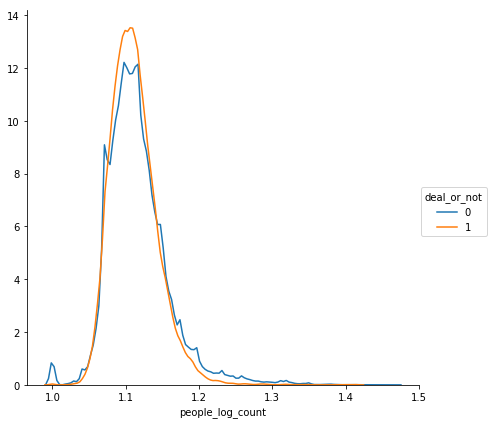

In [110]:
sns.FacetGrid(tmp_table, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "people_log_count") \
   .add_legend()

In [5]:
long_weekend_feat = pd.read_csv("feature_extraction/long_weekend_feature.csv")
train_set = pd.merge(train_set, long_weekend_feat, on="group_id", how="left")
for col in ["begin_date", "long_weekend_date"]:
    train_set[col] = pd.to_datetime(train_set[col])

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


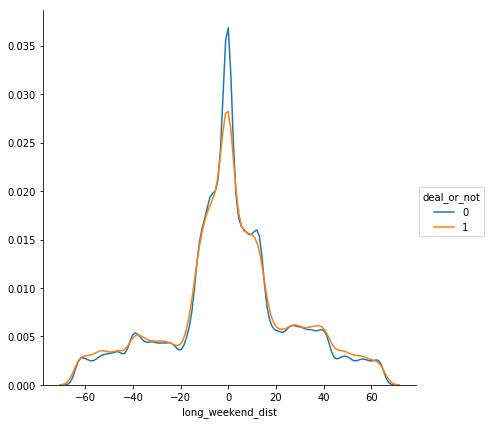

In [11]:
train_set["long_weekend_dist"] = list(map(lambda x: x.days, train_set["begin_date"] - train_set["long_weekend_date"]))
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "long_weekend_dist") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


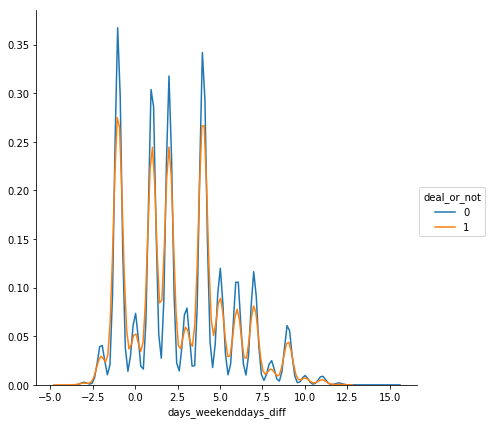

In [12]:
train_set["days_weekenddays_diff"] = train_set["days"] - train_set["long_weekend_days"]
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "days_weekenddays_diff") \
   .add_legend()

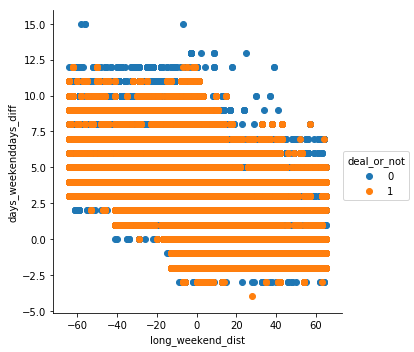

In [14]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "long_weekend_dist", "days_weekenddays_diff") \
   .add_legend()

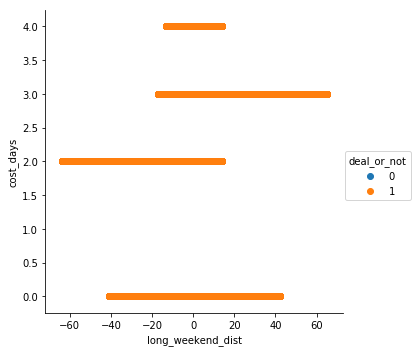

In [16]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "long_weekend_dist", "cost_days") \
   .add_legend()

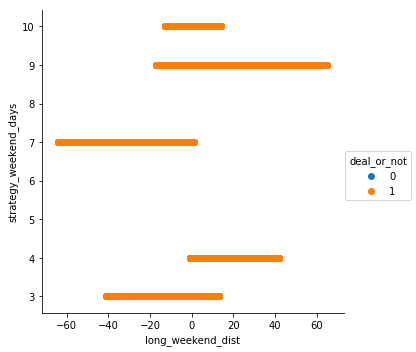

In [17]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "long_weekend_dist", "strategy_weekend_days") \
   .add_legend()

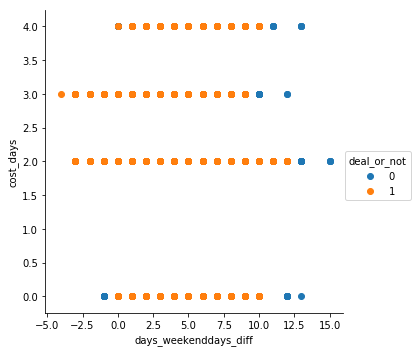

In [18]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "days_weekenddays_diff", "cost_days") \
   .add_legend()

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


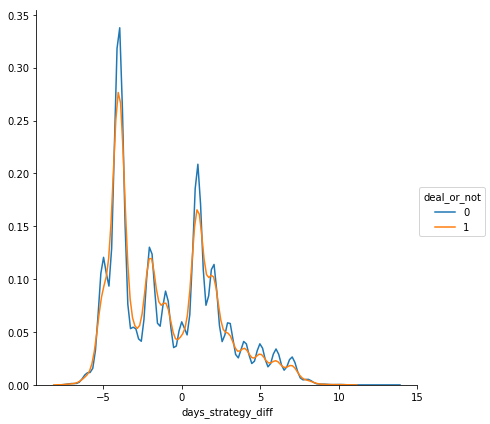

In [19]:
train_set["days_strategy_diff"] = train_set["days"] - train_set["strategy_weekend_days"]
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
   .map(sns.kdeplot, "days_strategy_diff") \
   .add_legend()

In [7]:
group_price_days = pd.read_csv("./feature_extraction/features/group_days_price.csv")
train_set = pd.merge(train_set, group_price_days, on="group_id", how="left")

In [8]:
train_set.columns

Index(['order_id', 'deal_or_not', 'group_id', 'order_date', 'source_1',
       'source_2', 'unit', 'people_amount', 'sub_line', 'area', 'days',
       'begin_date', 'price', 'product_name', 'promotion_prog',
       'subline_price_z', 'subline_days_z', 'area_price_z', 'area_days_z',
       'overall_price_z', 'overall_days_z'],
      dtype='object')

In [17]:
gb = train_set.groupby("group_id", as_index=False)["deal_or_not"].mean()
group_price_days = pd.merge(group_price_days, gb, on="group_id", how="left")

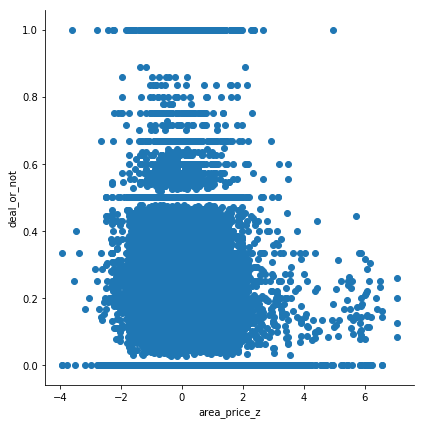

In [24]:
sns.FacetGrid(group_price_days, size=6) \
.map(plt.scatter, "area_price_z", "deal_or_not")

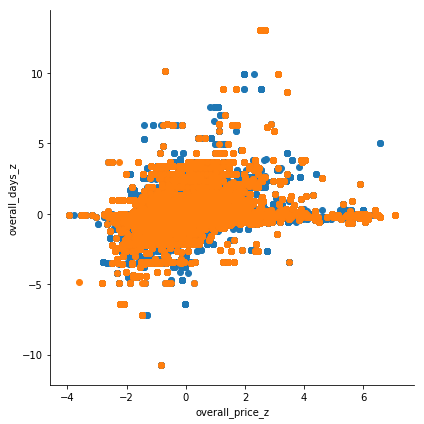

In [26]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
.map(plt.scatter, "overall_price_z", "overall_days_z")

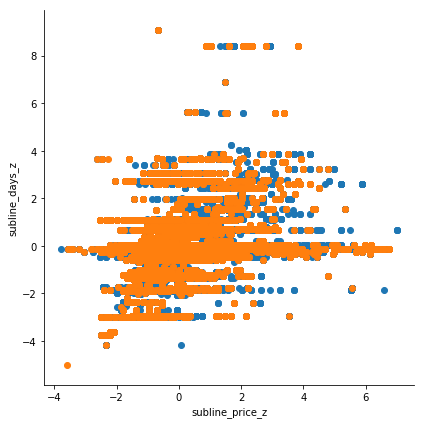

In [27]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
.map(plt.scatter, "subline_price_z", "subline_days_z")

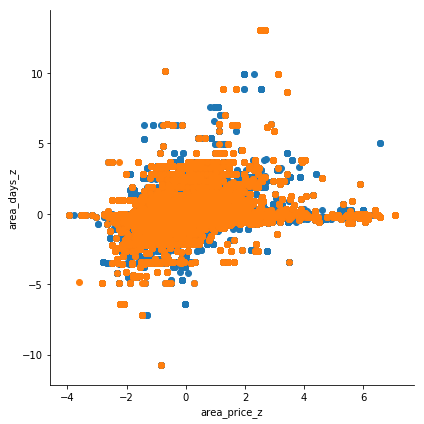

In [28]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
.map(plt.scatter, "area_price_z", "area_days_z")

In [17]:
unit_group_count = train_set.groupby(["unit", "group_id"])["order_id"].count().reset_index()
unit_group_count.rename({"order_id": "process_count"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, unit_group_count, on=["unit", "group_id"], how="left")

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


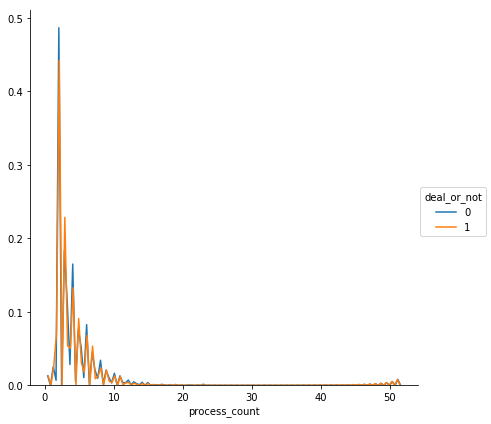

In [20]:
sns.FacetGrid(data=train_set, hue="deal_or_not", size=6)\
.map(sns.kdeplot, "process_count")\
.add_legend()

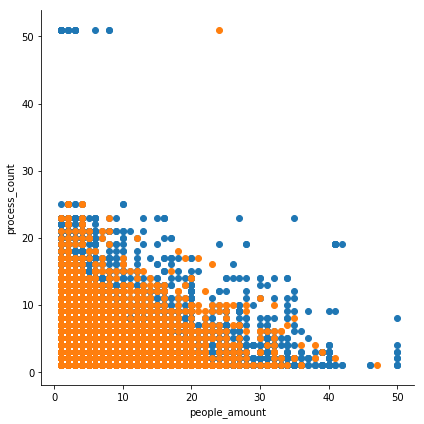

In [32]:
sns.FacetGrid(data=train_set, hue="deal_or_not", size=6)\
.map(plt.scatter, "people_amount", "process_count")

In [29]:
source1_group_count = train_set.groupby(["source_1", "group_id"])["order_id"].count().reset_index()
source1_group_count.rename({"order_id": "source1_count"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, source1_group_count, on=["source_1", "group_id"], how="left")

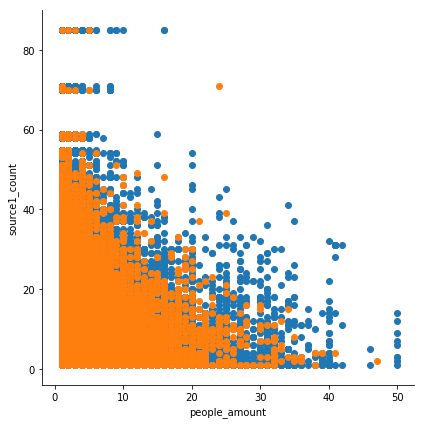

In [31]:
sns.FacetGrid(data=train_set, hue="deal_or_not", size=6)\
.map(plt.scatter, "people_amount", "source1_count")

In [33]:
source2_group_count = train_set.groupby(["source_2", "group_id"])["order_id"].count().reset_index()
source2_group_count.rename({"order_id": "source2_count"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, source2_group_count, on=["source_2", "group_id"], how="left")

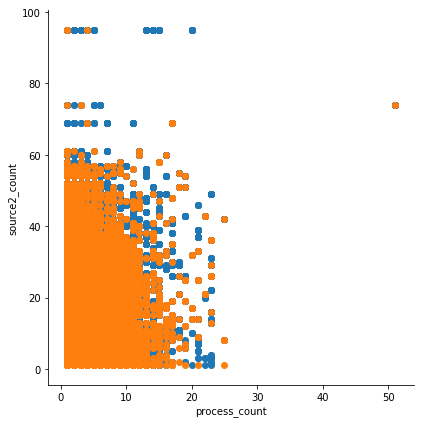

In [37]:
sns.FacetGrid(data=train_set, hue="deal_or_not", size=6)\
.map(plt.scatter, "process_count", "source2_count")

In [38]:
mix_group_count = train_set.groupby(["source_1", "source_2", "group_id"])["order_id"].count().reset_index()
mix_group_count.rename({"order_id": "source_mix_count"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, mix_group_count, on=["source_1", "source_2", "group_id"], how="left")

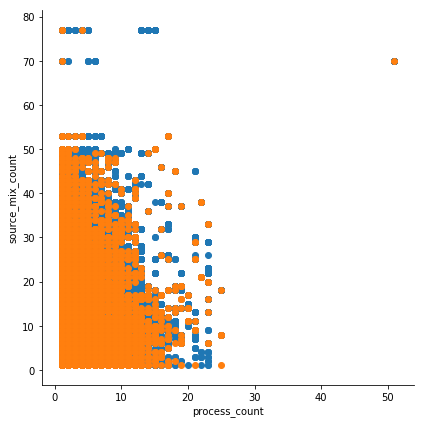

In [43]:
sns.FacetGrid(data=train_set, hue="deal_or_not", size=6)\
.map(plt.scatter, "process_count", "source_mix_count")